In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow
print(tensorflow.__version__)

1.15.2


In [ ]:
DATADIR = '/content/drive/MyDrive/updated segmented images'

In [ ]:
import numpy as np
import pandas as pd

import cv2
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import max_norm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from matplotlib import pyplot as plt

In [ ]:
from keras.preprocessing import image

In [ ]:
img_data_list1=[]
img_data_list2=[]
img_data_list3=[]
img_data_list4=[]

label_list1=[]
label_list2=[]
label_list3=[]
label_list4=[]

count = 0
for img in os.listdir(DATADIR):
  img_array = cv2.imread(os.path.join(DATADIR,img))
  new_array = cv2.resize(img_array,(150,200))
  img_tensor = image.img_to_array(new_array)
  if img[4:5]=='0' or img[4:5]=='6':
    img_data_list1.append(img_tensor)
    label_list1.append(img[0:3])
  if img[4:5]=='1' or img[4:5]=='5':
    img_data_list2.append(img_tensor)
    label_list2.append(img[0:3])
  if img[4:5]=='2' or img[4:5]=='4':
    img_data_list3.append(img_tensor)
    label_list3.append(img[0:3])
  if img[4:5]=='3':
    img_data_list4.append(img_tensor)
    label_list4.append(img[0:3])

In [ ]:
train_img = np.array(img_data_list1)
train_img = np.append(train_img,np.array(img_data_list2),axis=0)
train_img = np.append(train_img,np.array(img_data_list3),axis=0)

train_img/=255

train_label = np.array(label_list1)
train_label = np.append(train_label,np.array(label_list2),axis=0)
train_label = np.append(train_label,np.array(label_list3),axis=0)

test_img = np.array(img_data_list3)

test_img/=255

test_label = np.array(label_list3)

validate_img = np.array(img_data_list4)

validate_img/=255

validate_label = np.array(label_list4)

In [ ]:
print(len(sorted(list(set(train_label)))))

108


In [ ]:
train_label = np.array(train_label)
test_label = np.array(test_label)
train_label = np_utils.to_categorical(train_label)
test_label = np_utils.to_categorical(test_label)
validate_label = np_utils.to_categorical(validate_label)
num_classes = train_label.shape[1]
print('data normalized and hot encoded')
print(num_classes)

data normalized and hot encoded
109


In [ ]:
print('after conversion to one-hot:',train_label[0])

after conversion to one-hot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
def createCNNModel(num_classes):
  model = Sequential()
  model.add(Convolution2D(32,3,3,input_shape=(200,150,3),border_mode='same',activation='relu',W_constraint=max_norm(3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Convolution2D(64,3,3,border_mode='same',activation='relu',W_constraint=max_norm(3)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Convolution2D(128,3,3,border_mode='same',activation='relu',W_constraint=max_norm(3)))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  model.add(Dense(512,activation='relu',W_constraint=max_norm(3)))
  model.add(Dropout(0.3))
  model.add(Dense(256,activation='relu',W_constraint=max_norm(3)))
  model.add(Dense(num_classes,activation='softmax'))

  epochs=100
  lrate = 0.01
  decay = lrate/epochs
  sgd = SGD(lr=lrate,momentum=0.9,decay=decay,nesterov=False)
  model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
  print(model.summary())
  return model,epochs
num_classes = 109
model,epochs = createCNNModel(num_classes)
print("CNN MODEL created.")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 200, 150, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 100, 75, 32)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 75, 64)       18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 37, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 50, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 18, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 57600)            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 150,..., activation="relu", padding="same", kernel_constraint=<keras.con...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same", kernel_constraint=<keras.con...)`
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same", kernel_constraint=<keras.con...)`
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, activation="relu", kernel_constraint=<keras.con...)`
  # This is added back by InteractiveShellApp.i

In [ ]:
model.fit = model.fit(train_img,train_label,validation_data=(validate_img,validate_label),nb_epoch=epochs,batch_size=32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 648 samples, validate on 108 samples
Epoch 1/100
648/648 [==============================] - 1s 2ms/step - loss: 4.7017 - accuracy: 0.0046 - val_loss: 4.6865 - val_accuracy: 0.0185
Epoch 2/100
648/648 [==============================] - 1s 2ms/step - loss: 4.6926 - accuracy: 0.0062 - val_loss: 4.6857 - val_accuracy: 0.0185
Epoch 3/100
648/648 [==============================] - 1s 2ms/step - loss: 4.6858 - accuracy: 0.0123 - val_loss: 4.6789 - val_accuracy: 0.0463
Epoch 4/100
648/648 [==============================] - 1s 2ms/step - loss: 4.6755 - accuracy: 0.0108 - val_loss: 4.6625 - val_accuracy: 0.0648
Epoch 5/100
648/648 [==============================] - 1s 2ms/step - loss: 4.6578 - accuracy: 0.0370 - val_loss: 4.6363 - val_accuracy: 0.0833
Epoch 6/100
648/648 [==============================] - 1s 2ms/step - loss: 4.6172 - accuracy: 0.0571 - val_loss: 4.5432 - val_accuracy: 0.1296
Epoch 7/100
648/648 [==============================] - 1s 2ms/step - loss: 4.4797 - accuracy: 0.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
l=model.predict(validate_img)
v=[]
for i in l:
  v.append(i.argmax())

In [ ]:
v1=[]
for i in validate_label:
  v1.append(i.argmax())

In [ ]:
print(len(v))
print(v1)

108
[1, 2, 3, 4, 5, 6, 8, 9, 13, 14, 16, 18, 19, 21, 22, 10, 15, 17, 25, 26, 29, 28, 30, 31, 32, 33, 34, 36, 37, 40, 41, 43, 46, 47, 48, 49, 50, 51, 52, 53, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 100, 102, 103, 104, 105, 106, 107, 108, 20, 23, 11, 12, 24, 27, 35, 42, 57, 98, 7, 38, 39, 44, 45, 54, 55, 68, 95, 97, 99, 101]


AxesImage(54,36;334.8x217.44)


Text(0.5, 15.0, 'Predicted label')

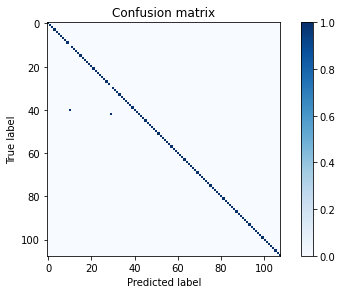

In [ ]:
print(plt.imshow(confusion_matrix(v,v1),interpolation='nearest', cmap=plt.cm.Blues))
plt.title("Confusion matrix")
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
print(classification_report(v,v1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       0.00      0.00      0.00         0
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         1
          18       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0, 0.5, 'Accuracy')

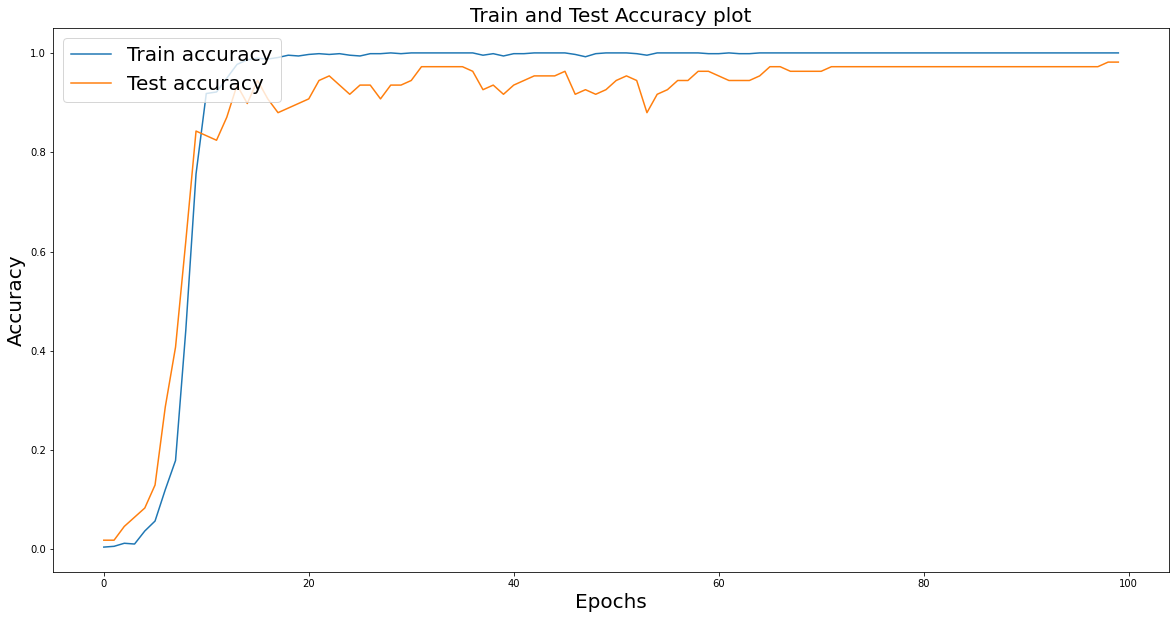

In [ ]:
train_loss = model.fit.history['loss']
val_loss = model.fit.history['val_loss']
train_acc = model.fit.history['accuracy']
val_acc = model.fit.history['val_accuracy']
xc = range(epochs)

plt.figure(figsize=(20,10))
plt.plot(xc,train_acc,label = 'Train accuracy')
plt.plot(xc,val_acc,label='Test accuracy')
plt.legend(loc='upper left',prop={'size':20})
plt.title('Train and Test Accuracy plot',size=20)
plt.xlabel('Epochs',size=20)
plt.ylabel('Accuracy',size=20)

Text(0, 0.5, 'Loss')

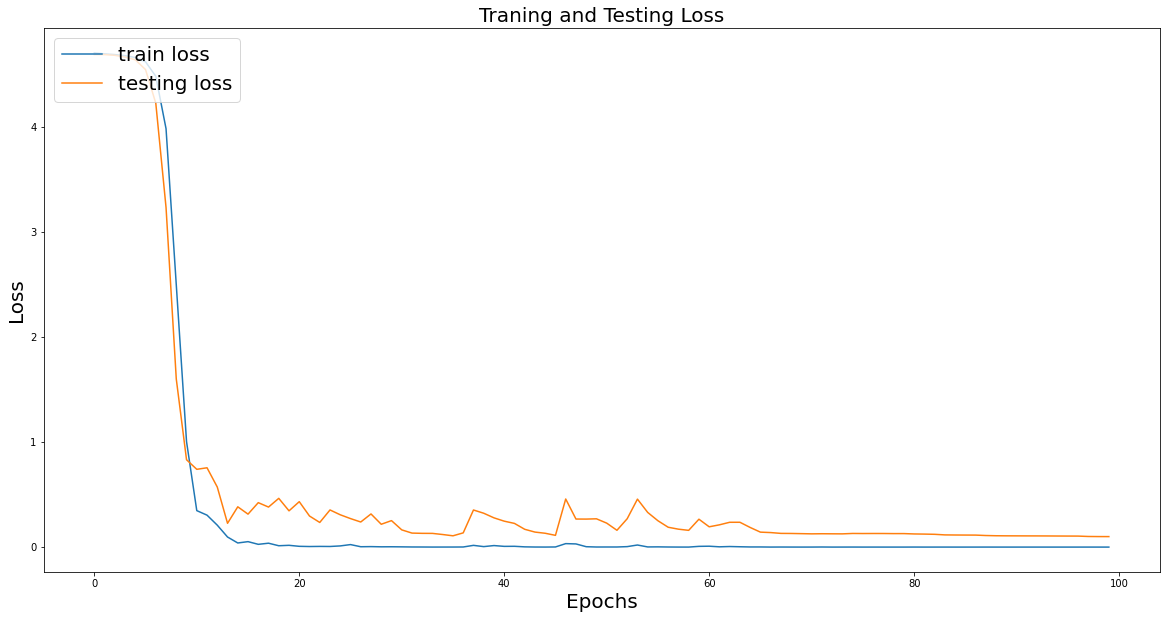

In [ ]:
train_loss = model.fit.history['loss']
val_loss = model.fit.history['val_loss']
train_acc = model.fit.history['accuracy']
val_acc = model.fit.history['val_accuracy']
xc = range(epochs)
plt.figure(figsize=(20,10))
plt.plot(xc,train_loss,label = 'train loss')
plt.plot(xc,val_loss,label='testing loss')
plt.legend(loc='upper left',prop={'size':20})
plt.title('Traning and Testing Loss',size=20)
plt.xlabel('Epochs',size=20)
plt.ylabel('Loss',size=20)